In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 

plt.rcParams["figure.figsize"] = [10, 7]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

data = pd.read_pickle('./data/scenario_1_tax.p')
data.head()


tax_rate_vacancy  Run                                           arrivals  \
165             0.020  165           id       budget  arrived at step  uni...   
113             0.015  113           id       budget  arrived at step  uni...   
156             0.020  156           id       budget  arrived at step  uni...   
139             0.015  139           id        budget  arrived at step  un...   
172             0.020  172           id       budget  arrived at step  uni...   

                                            departures  \
165          id       budget  departed at step  uni...   
113          id        budget  departed at step  un...   
156          id       budget  departed at step  uni...   
139          id       budget  departed at step  uni...   
172          id       budget  departed at step  uni...   

                                housing unit ownership  \
165        step  unit id                           ...   
113        step  unit id                           ...   
156        step  unit id                           ...   
139        step  unit id                           ...   
172        step  unit id                           ...   

                                        neighbourhoods  rental transactions  \
165      id     neighbourhood                      ...                  101   
113      id neighbourhood                          ...                   97   
156      id        neighbourhood  \
0   52         ...                   86   
139      id     neighbourhood                      ...                  101   
172      id        neighbourhood  \
0   64     Beir...                   98   

                                               rentals  \
165       unit_id  area         price  steps_in_mar...   
113      unit_id  area         price  steps_in_mark...   
156      unit_id  area        price  steps_in_marke...   
139       unit_id  area        price  steps_in_mark...   
172      unit_id  area         price  steps_in_mark...   

                                             residents  sale transactions  \
165           id  step       budget      home  tenu...                775   
113           id  step        budget      home tenu...                738   
156           id  step        budget      home tenu...                732   
139           id  step        budget      home tenu...                743   
172           id  step       budget      home  tenu...                697   

                                                 sales  unhoused tenants  \
165       unit_id  area         price  steps_in_mar...                89   
113       unit_id  area         price  steps_in_mar...                85   
156       unit_id  area          price  steps_in_ma...                88   
139       unit_id  area         price  steps_in_mar...                94   
172       unit_id  area         price  steps_in_mar...                80   

     vacancy (for rent)  vacancy (for sale)  vacancy (off market)  \
165            0.003317            0.154045              0.035194   
113            0.000737            0.151096              0.048830   
156            0.000184            0.165469              0.036853   
139            0.002027            0.147227              0.056200   
172            0.003501            0.170260              0.033167   

     vacancy total  tax_rate_property  tax_rate_transfer  \
165       0.192556               0.01               0.01   
113       0.200663               0.01               0.01   
156       0.202506               0.01               0.01   
139       0.205454               0.01               0.01   
172       0.206928               0.01               0.01   

                                   file  new_households_per_1k_units_per_step  \
165  ../../neighbourhoods_clean.geojson                                   9.5   
113  ../../neighbourhoods_clean.geojson                                   9.5   
156  ../../neighbourhoods_clean.geojson                  

<AxesSubplot:xlabel='sale transactions', ylabel='Probability'>

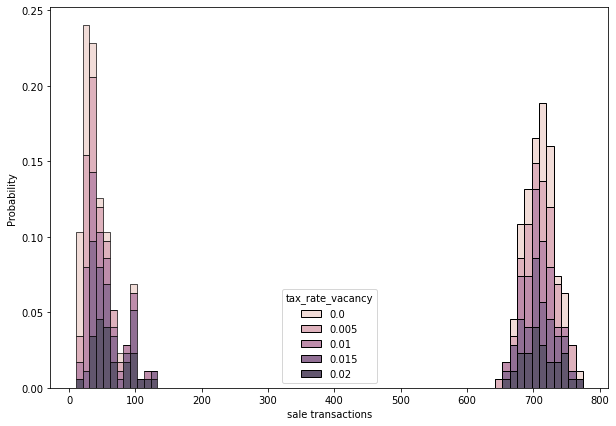

In [42]:
import seaborn as sns 
#data['residents'].iloc[0]['budget']
#data.describe()

sns.histplot(data=data, x='sale transactions', multiple='stack', stat='probability', hue='tax_rate_vacancy',)
sns.histplot(data=data, x='rental transactions', multiple='stack', stat='probability', hue='tax_rate_vacancy',)


<AxesSubplot:xlabel='tax_rate_vacancy', ylabel='sale transactions'>

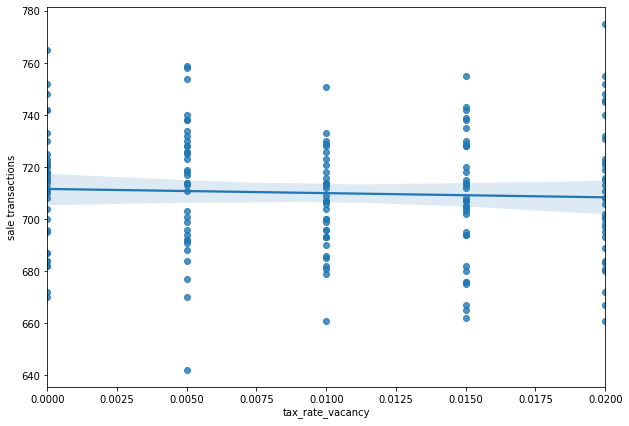

In [58]:
data.groupby('tax_rate_vacancy').describe()
#data.groupby('tax_rate_vacancy').hist(column=['rental transactions', 'sale transactions'])

#data.groupby('tax_rate_vacancy').hist(column=['rental transactions', 'sale transactions'])

#sns.regplot(data=data, y='rental transactions', x='tax_rate_vacancy')
sns.regplot(data=data, y='sale transactions', x='tax_rate_vacancy')
#plt.xlim(-0.001, 0.0021)

In [21]:
import inequality


def gini(r):
    residents = r['residents']
#    return residents['budget'].count()
    gini = inequality.gini.Gini(residents['budget'])
    return gini.g


    
data['gini'] = data.apply(gini, axis=1)



<AxesSubplot:xlabel='gini', ylabel='Probability'>

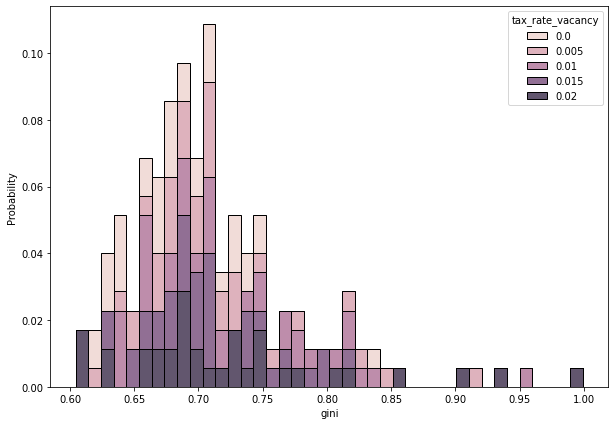

In [30]:
import seaborn as sns 

sns.histplot(data=data, x='gini', hue='tax_rate_vacancy', multiple='stack', bins=40, stat='probability')
#.hist(bins=40, )

In [2]:
data['vacancy (for rent)'] = data['vacancy (for rent)'] * 100
data['vacancy (for sale)'] = data['vacancy (for sale)'] * 100
data['vacancy (off market)'] = data['vacancy (off market)'] * 100
data['vacancy total'] = data['vacancy total'] * 100
data['tax_rate_vacancy'] = data['tax_rate_vacancy'] * 100


In [3]:
corr = np.corrcoef(data['tax_rate_vacancy'], data['vacancy total'])

corr_ = corr[0][1]


In [4]:
data[['vacancy (for rent)', 'vacancy (for sale)', 'vacancy (off market)', 'vacancy total']].describe().round(decimals=2)


vacancy (for rent)  vacancy (for sale)  vacancy (off market)  \
count              175.00              175.00                175.00   
mean                 0.08               17.34                  4.85   
std                  0.25                1.36                  1.10   
min                  0.00               13.17                  2.60   
25%                  0.00               16.55                  4.12   
50%                  0.00               17.60                  4.72   
75%                  0.00               18.22                  5.46   
max                  1.36               19.85                  8.26   

       vacancy total  
count         175.00  
mean           22.27  
std             0.71  
min            19.26  
25%            21.85  
50%            22.37  
75%            22.74  
max            24.05

 
-0.3122 x + 22.58


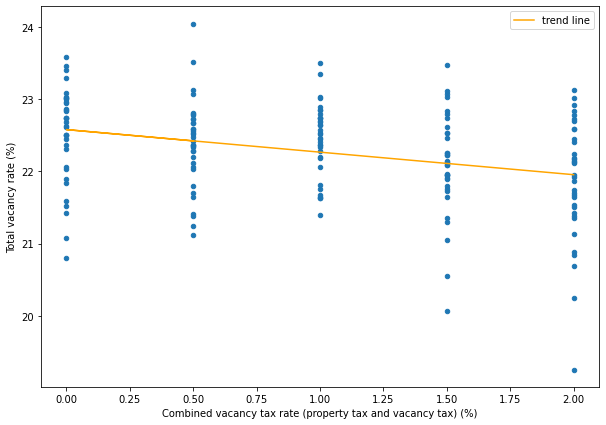

In [5]:
data.plot.scatter(x='tax_rate_vacancy', y='vacancy total', legend=True)

trend = np.polyfit(data['tax_rate_vacancy'], data['vacancy total'], 1)

trend_line = np.poly1d(trend)
print(trend_line)
plt.plot(data['tax_rate_vacancy'], trend_line(data['tax_rate_vacancy']), label='trend line', color='orange')

#plt.axhline(y=23, c='r', label='Initial vacancy rate')
plt.xlabel('Combined vacancy tax rate (property tax and vacancy tax) (%)')
plt.ylabel('Total vacancy rate (%)')
plt.legend()


Text(0, 0.5, 'Total vacancy rate (%)')

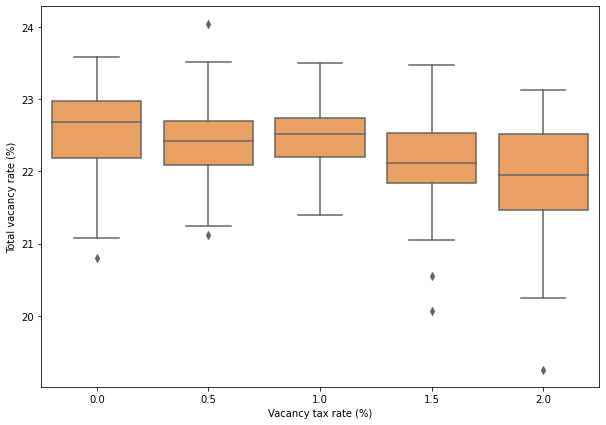

In [6]:
import seaborn as sns

ax = sns.boxplot(x='tax_rate_vacancy', y='vacancy total', data=data, color='#ff9f4b')

plt.xlabel('Vacancy tax rate (%)')
plt.ylabel('Total vacancy rate (%)')


In [7]:
ax = sns.regplot(x='tax_rate_vacancy', 
                 y='vacancy total', 
                 data=data, 
                 scatter=True, 
                 line_kws={'label': 'y={1:.1f}x+{2:.1f} \n r2={0:.4f}'.format(corr_**2, *trend_line.coeffs)})

#sns.boxplot(x='tax_rate_vacancy', y='vacancy total', data=data, color='#5975a4')
medians = data.groupby(['tax_rate_vacancy'])[['vacancy total']].apply(np.median)
med_df = pd.DataFrame(medians)
med_df.rename(columns = {0:'median'}, inplace = True) 
med_df.head()
sns.scatterplot(data=med_df, palette=['#ff9f4b'])

plt.xlabel('Vacancy tax rate (%)')
plt.ylabel('Total vacancy rate (%)')
plt.legend()
plt.xlim(-0.1, 2.1)

(-0.1, 2.1)

In [8]:
sns.regplot(x='tax_rate_vacancy', 
                 y='vacancy total', 
                 data=data, 
                 scatter=True, 
                 line_kws={'label': 'y={1:.1f}x+{2:.1f} \n r2={0:.4f}'.format(corr_**2, *trend_line.coeffs)})


plt.xlim(-0.1, 2.1)

(-0.1, 2.1)

Text(0.5, 0, 'Vacancy rate (%)')

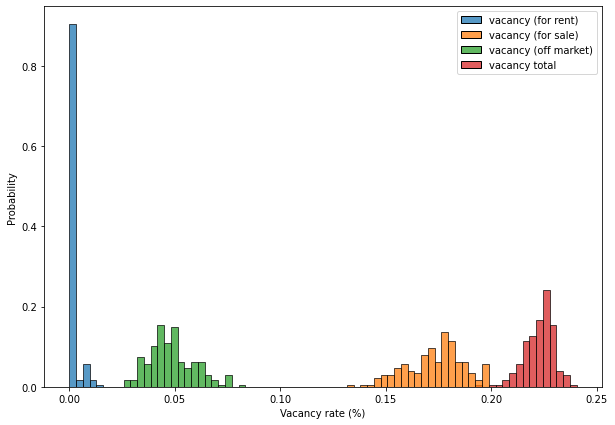

In [36]:
vacancy_df = data[['vacancy (for rent)', 'vacancy (for sale)', 'vacancy (off market)', 'vacancy total',]]# 'tax_rate_vacancy']]

sns.histplot(data=vacancy_df, bins=75, common_norm=False, stat='probability')#, hue='tax_rate_vacancy')

plt.xlabel('Vacancy rate (%)')
#plt.ylabel('Frequency')


In [10]:
#data['housing unit ownership'].iloc[0].head()
data.head()

tax_rate_vacancy  Run                                           arrivals  \
165               2.0  165           id       budget  arrived at step  uni...   
113               1.5  113           id       budget  arrived at step  uni...   
156               2.0  156           id       budget  arrived at step  uni...   
139               1.5  139           id        budget  arrived at step  un...   
172               2.0  172           id       budget  arrived at step  uni...   

                                            departures  \
165          id       budget  departed at step  uni...   
113          id        budget  departed at step  un...   
156          id       budget  departed at step  uni...   
139          id       budget  departed at step  uni...   
172          id       budget  departed at step  uni...   

                                housing unit ownership  \
165        step  unit id                           ...   
113        step  unit id                           ...   
156        step  unit id                           ...   
139        step  unit id                           ...   
172        step  unit id                           ...   

                                        neighbourhoods  rental transactions  \
165      id     neighbourhood                      ...                  101   
113      id neighbourhood                          ...                   97   
156      id        neighbourhood  \
0   52         ...                   86   
139      id     neighbourhood                      ...                  101   
172      id        neighbourhood  \
0   64     Beir...                   98   

                                               rentals  \
165       unit_id  area         price  steps_in_mar...   
113      unit_id  area         price  steps_in_mark...   
156      unit_id  area        price  steps_in_marke...   
139       unit_id  area        price  steps_in_mark...   
172      unit_id  area         price  steps_in_mark...   

                                             residents  sale transactions  \
165           id  step       budget      home  tenu...                775   
113           id  step        budget      home tenu...                738   
156           id  step        budget      home tenu...                732   
139           id  step        budget      home tenu...                743   
172           id  step       budget      home  tenu...                697   

                                                 sales  unhoused tenants  \
165       unit_id  area         price  steps_in_mar...                89   
113       unit_id  area         price  steps_in_mar...                85   
156       unit_id  area          price  steps_in_ma...                88   
139       unit_id  area         price  steps_in_mar...                94   
172       unit_id  area         price  steps_in_mar...                80   

     vacancy (for rent)  vacancy (for sale)  vacancy (off market)  \
165            0.331675           15.404459              3.519440   
113            0.073706           15.109637              4.882992   
156            0.018426           16.546895              3.685277   
139            0.202690           14.722683              5.620048   
172            0.350101           17.025981              3.316750   

     vacancy total  tax_rate_property  tax_rate_transfer  \
165      19.255574               0.01               0.01   
113      20.066335               0.01               0.01   
156      20.250599               0.01               0.01   
139      20.545421               0.01               0.01   
172      20.692832               0.01               0.01   

                                   file  new_households_per_1k_units_per_step  \
165  ../../neighbourhoods_clean.geojson                                   9.5   
113  ../../neighbourhoods_clean.geojson                                   9.5   
156  ../../neighbourhoods_clean.geojson                  

In [48]:
ownership_0 = gpd.read_file('../../data/data-202102082139/ownership_202102082139.geojson')
neighbourhoods_0 = gpd.read_file('../../data/data-202102082139/neighbourhoods_202102082139.geojson')

ownership_2 = gpd.read_file('../../data/data-202102082141/ownership_202102082141.geojson')
neighbourhoods_2 = gpd.read_file('../../data/data-202102082141/neighbourhoods_202102082141.geojson')


In [12]:

ownership_0['rent delta'] = ownership_0['rent delta'].clip(-20, 40)
ownership_2['rent delta'] = ownership_2['rent delta'].clip(-20, 40)

neighbourhoods_0['vacancy rate'] = neighbourhoods_0['vacancy rate'] * 100
neighbourhoods_2['vacancy rate'] = neighbourhoods_2['vacancy rate'] * 100

In [13]:
neighbourhoods_0.describe()

id  average unit area  average price  average rent  vacancy rate
count  73.000000          73.000000      73.000000     73.000000     73.000000
mean   37.000000         113.698630    3859.301323     13.870867     22.809714
std    21.217131          38.712145    2268.525396      5.429281     10.966171
min     1.000000          90.000000    1802.540964      7.214267      0.000000
25%    19.000000          90.000000    2484.187917      9.962022     14.285714
50%    37.000000          90.000000    3121.860387     12.428150     23.076923
75%    55.000000         140.000000    3910.942311     15.562796     30.555556
max    73.000000         220.000000   11987.612076     31.462459     64.705882

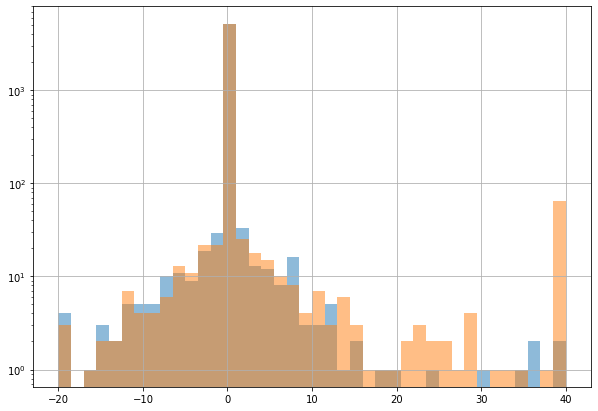

In [14]:
ownership_0['rent delta'].hist(bins=40, alpha=0.5) #range=[-60,60],
ownership_2['rent delta'].hist(bins=40, alpha=0.5) #range=[-60,60], 
plt.yscale('log')


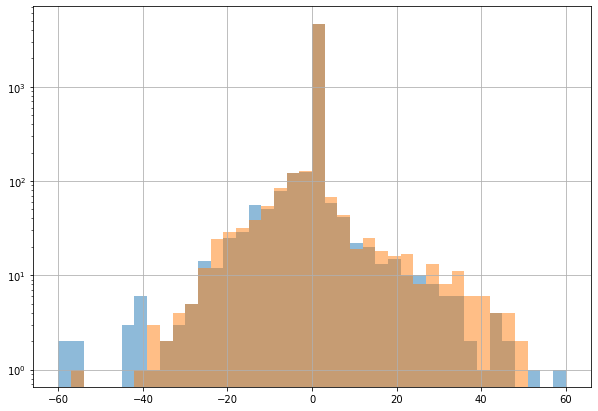

In [15]:
ownership_0['sale delta'].hist(bins=40, range=[-60,60], alpha=0.5)
ownership_2['sale delta'].hist(bins=40, range=[-60,60], alpha=0.5)
plt.yscale('log')

<AxesSubplot:>

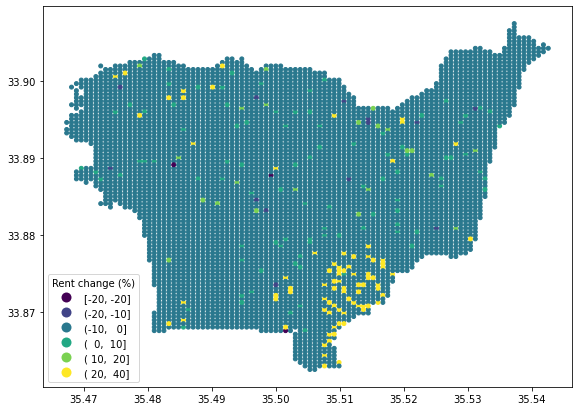

In [16]:
ownership_2.plot(column='rent delta', 
                 scheme='userdefined',
                 classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                 legend=True,
                 legend_kwds={'fmt': '{:.0f}', 
                              'title': 'Rent change (%)'},
                 marker='o',
                 markersize=15.5,
)



In [17]:
neighbourhoods_0.plot(column='vacancy rate',
#                      scheme='userdefined',
#                      classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                      legend=True,
#                      legend_kwds={'fmt': '{:.0f}', 
#                                   'title': 'Vacancy rate (%)'},
)

<AxesSubplot:>

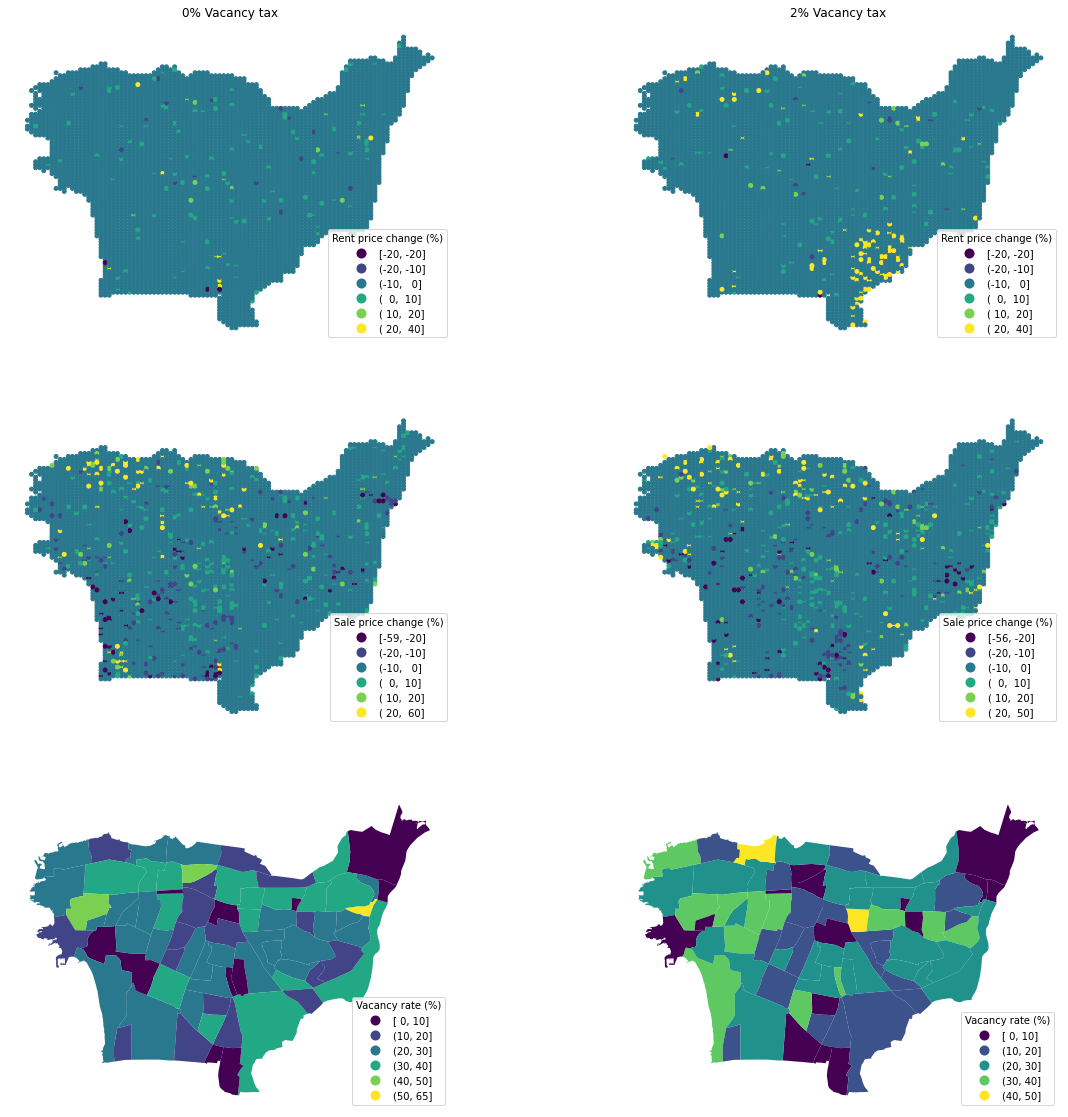

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# add titles
axs[0, 0].set_title('0% Vacancy tax')
axs[0, 1].set_title('2% Vacancy tax')

## with 0% vacancy tax
ownership_0.plot(column='rent delta', 
                 ax=axs[0, 0],
                 scheme='userdefined',
                 classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                 legend=True,
                 legend_kwds={'fmt': '{:.0f}', 
                              'title': 'Rent price change (%)'},
                 marker='o',
                 markersize=15.5,
)

ownership_0.plot(column='sale delta', 
                 ax=axs[1, 0],
                 scheme='userdefined',
                 classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                 legend=True,
                 legend_kwds={'fmt': '{:.0f}', 
                              'title': 'Sale price change (%)'},
                 marker='o',
                 markersize=15.5,
)
neighbourhoods_0.plot(column='vacancy rate',
                      ax=axs[2, 0],
                      scheme='userdefined',
                      classification_kwds={'bins': [10, 20, 30, 40, 50]}, 
                      legend=True,
                      legend_kwds={'fmt': '{:.0f}', 
                                   'title': 'Vacancy rate (%)',
                                   'loc': 'lower right'},
)


### with 2% vacancy tax
ownership_2.plot(column='rent delta', 
                 ax=axs[0, 1],
                 scheme='userdefined',
                 classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                 legend=True,
                 legend_kwds={'fmt': '{:.0f}', 
                              'title': 'Rent price change (%)'},
                 marker='o',
                 markersize=15.5,
)

ownership_2.plot(column='sale delta', 
                 ax=axs[1, 1],
                 scheme='userdefined',
                 classification_kwds={'bins': [-20, -10, 0, 10, 20]}, 
                 legend=True,
                 legend_kwds={'fmt': '{:.0f}', 
                              'title': 'Sale price change (%)'},
                 marker='o',
                 markersize=15.5,
)
neighbourhoods_2.plot(column='vacancy rate',
                      ax=axs[2, 1],
                      scheme='userdefined',
                      classification_kwds={'bins': [10, 20, 30, 40, 50]}, 
                      legend=True,
                      legend_kwds={'fmt': '{:.0f}', 
                                   'title': 'Vacancy rate (%)',
                                   'loc': 'lower right'},
)
for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(frame_on=False)


In [50]:
neighbourhoods_0['vacancy rate'] = neighbourhoods_0['vacancy rate'] * 100
neighbourhoods_2['vacancy rate'] = neighbourhoods_2['vacancy rate'] * 100


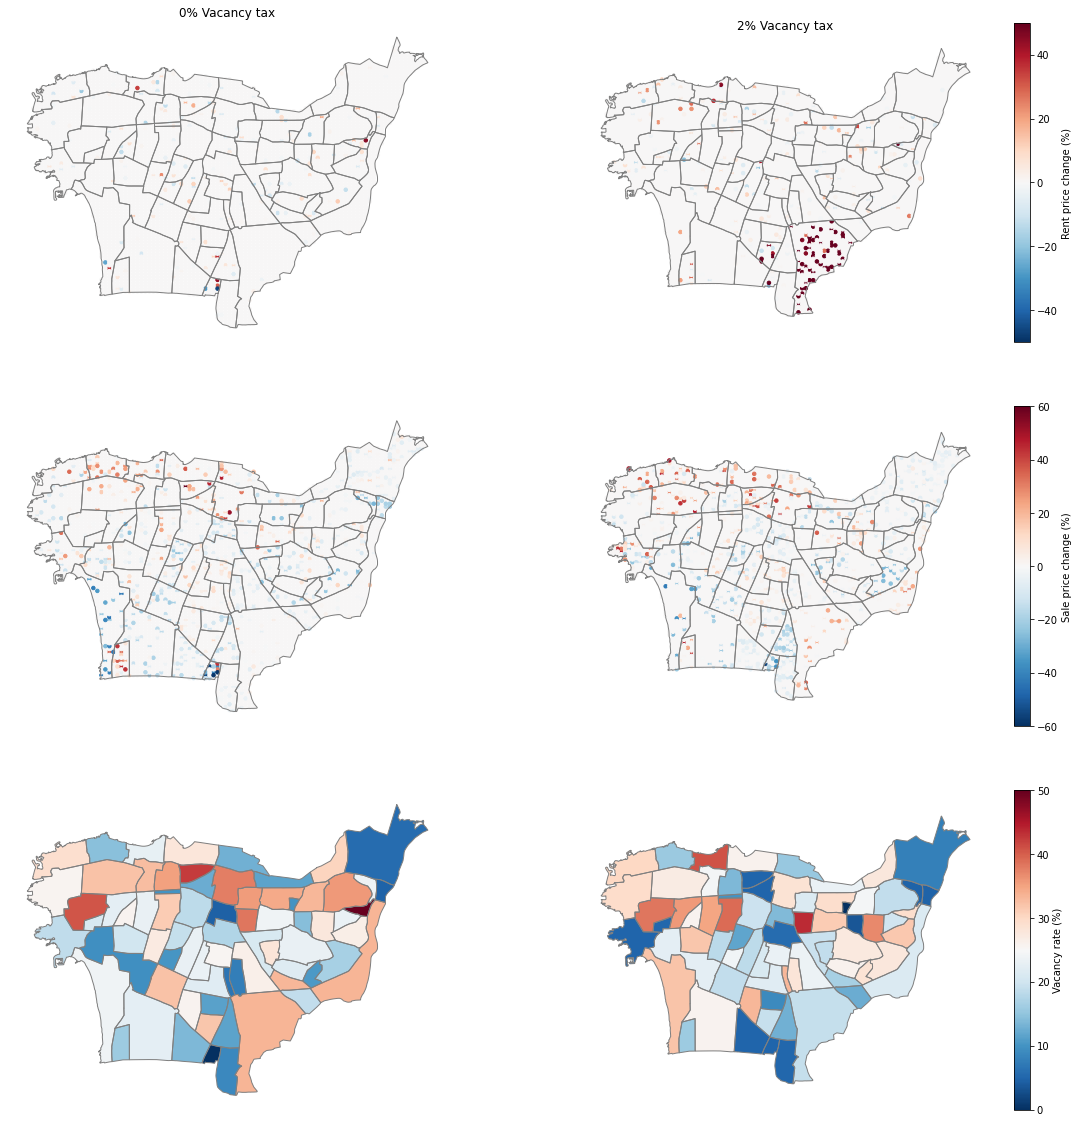

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 

boundaries = gpd.read_file('../../neighbourhoods_clean.geojson')


fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# add titles
axs[0, 0].set_title('0% Vacancy tax')
axs[0, 1].set_title('2% Vacancy tax')

## with 0% vacancy tax
ownership_0.plot(column='rent delta', 
                 ax=axs[0, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
                 vmin=-50,
                 vmax=50,
)

ownership_0.plot(column='sale delta', 
                 ax=axs[1, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-60,
                 vmax=60,
)
neighbourhoods_0.plot(column='vacancy rate',
                      ax=axs[2, 0],
                      legend=False,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)


### with 2% vacancy tax
ownership_2.plot(column='rent delta', 
                 ax=axs[0, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
                 vmin=-50,
                 vmax=50,
)

ownership_2.plot(column='sale delta', 
                 ax=axs[1, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-60,
                 vmax=60,
)
neighbourhoods_2.plot(column='vacancy rate',
                      ax=axs[2, 1],
                      legend=True,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)
#axs[2, 0].set_clim(0, 60)
#plt.set_clim(0, 60)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(frame_on=False)
        boundaries.plot(ax=ax, facecolor="none", edgecolor="#808080")


In [41]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, parent_dir) 

from model import BSRIModel

from mesa.batchrunner import BatchRunner
from agents.investor import InvestorAgent


fixed_params = {
    "tax_rate_property": 0.01,
    "tax_rate_transfer": 0.01,
    "file": '../../neighbourhoods_clean.geojson',
    "new_households_per_1k_units_per_step": 9.5,
    "central_bank_interest_rate": 0.1,
    "household_units_to_sample": 10,
    "tax_rate_property_vacant": 0.0,
#    "tax_rate_vacancy": 0.02,
}
                                      
variable_params = {
    "tax_rate_vacancy": [0, 0.02],
}


model_reporters={
    "rental transactions": lambda model: model.transaction_count_rent_cumulative,
    "sale transactions": lambda model: model.transaction_count_sale_cumulative,
    "rentals": lambda model:  model.datacollector.get_table_dataframe('rentals'),
    "sales": lambda model:  model.datacollector.get_table_dataframe('sales'),
    "unhoused tenants": lambda model: len(model.households_without_homes),
    "vacancy total": lambda model: len(model.vacancies)/model.n_housing_units, 
    "vacancy (off market)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'no' and isinstance(unit.owner, InvestorAgent)])/model.n_housing_units, 
    "vacancy (for sale)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'sale'])/model.n_housing_units, 
    "vacancy (for rent)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'rent'])/model.n_housing_units, 
    "arrivals": lambda model: model.datacollector.get_table_dataframe('arrivals'), 
    "residents": lambda model: model.datacollector.get_table_dataframe('residents'), 
    "departures": lambda model: model.datacollector.get_table_dataframe('departures'), 
    "housing unit ownership": lambda model: model.datacollector.get_table_dataframe('housing unit ownership'),
    "neighbourhoods": lambda model: model.datacollector.get_table_dataframe('neighbourhoods')
}


batch_run = BatchRunner(BSRIModel,
                        variable_parameters=variable_params,
                        fixed_parameters=fixed_params,
                        iterations=1,
                        max_steps=20,
                        model_reporters=model_reporters)
batch_run.run_all()

0it [00:00, ?it/s]

>>>>> initialized with 5427 housing units


1it [00:52, 52.36s/it]

>>>>> -------------- SIMULATION COMPLETE AFTER 20 STEPS
>>>>> initialized with 5427 housing units


2it [01:54, 57.36s/it]

>>>>> -------------- SIMULATION COMPLETE AFTER 20 STEPS


In [42]:
import geopandas as gpd

data = batch_run.get_model_vars_dataframe()

run_0 = data.iloc[0]
run_2 = data.iloc[1]

ownership_0 = gpd.GeoDataFrame(run_0['housing unit ownership'])
ownership_2 = gpd.GeoDataFrame(run_2['housing unit ownership'])


neighbourhoods_0 = gpd.GeoDataFrame(run_0['neighbourhoods'])
neighbourhoods_2 = gpd.GeoDataFrame(run_2['neighbourhoods'])

In [43]:
neighbourhoods_2.head()

id neighbourhood                                           geometry  \
0  73     Karantina  POLYGON ((35.52722 33.90387, 35.52782 33.90411...   
1  46       Sagesse  POLYGON ((35.52405 33.89622, 35.52411 33.89603...   
2  11       Sanayeh  POLYGON ((35.49106 33.89453, 35.49108 33.89407...   
3  42  Ras el Nabeh  POLYGON ((35.50846 33.88652, 35.50886 33.88601...   
4  15     Mar Elias  POLYGON ((35.49635 33.88566, 35.49588 33.88558...   

   average unit area  average price  average rent  \
0                 90    1753.953843      7.237061   
1                 90    3472.289576     13.889158   
2                140    3840.878958     15.568110   
3                 90    2667.555899     10.879296   
4                 90    2183.768304      9.193367   

                               average price history  \
0  [1860, 1880, 1900, 1857, 1850.184414893617, 18...   
1  [3700, 3400, 3100, 3333, 3313.296088235294, 33...   
2  [3723, 3823, 3922, 3880, 3897.354956840178, 38...   
3  [2825, 2840, 2854, 2795, 2781.7139084507044, 2...   
4  [2939, 2846, 2753, 2580, 2507.6584680252986, 2...   

                                average rent history  vacancy rate  \
0  [7.44, 7.5200000000000005, 7.6000000000000005,...      0.090253   
1  [14.8, 13.6, 12.4, 13.332, 13.253184352941178,...      0.245614   
2  [14.892, 15.292, 15.688, 15.52, 15.58941982736...      0.304348   
3  [11.3, 11.36, 11.416, 11.18, 11.12685563380281...      0.306122   
4  [11.756, 11.384, 11.012, 10.32, 10.03063387210...      0.142857   

   vacancy rate normalized  unit count  
0                 0.000326         277  
1                 0.004309          57  
2                 0.004411          69  
3                 0.003124          98  
4                 0.003401          42

In [44]:
ownership_2.describe()

step      unit id         area            x            y  \
count  5427.0  5427.000000  5427.000000  5427.000000  5427.000000   
mean     20.0  2787.000000   114.235489    46.381979    52.582458   
std       0.0  1566.784286    40.214022    23.182250    21.441861   
min      20.0    74.000000    53.000000     0.000000     0.000000   
25%      20.0  1430.500000    86.000000    28.000000    36.000000   
50%      20.0  2787.000000    97.000000    46.000000    54.000000   
75%      20.0  4143.500000   137.000000    64.000000    70.000000   
max      20.0  5500.000000   254.000000    99.000000    98.000000   

        investor id   price rent    price sale  price sale init  \
count   1733.000000  5427.000000  5.427000e+03     5.427000e+03   
mean   10785.798038  1923.553751  4.806139e+05     4.785608e+05   
std     1648.788436  1507.710873  3.872129e+05     3.735313e+05   
min     9119.000000   410.400000  1.026000e+05     1.026000e+05   
25%     9576.000000   967.240000  2.392000e+05     2.408335e+05   
50%    10049.000000  1290.240000  3.196000e+05     3.211300e+05   
75%    12753.000000  2407.400000  5.985000e+05     6.016710e+05   
max    13986.000000  8169.302853  2.926585e+06     2.006000e+06   

       price rent init   rent delta   sale delta  
count      5427.000000  5427.000000  5427.000000  
mean       1914.243366     0.426716    -0.229959  
std        1494.125294     4.620982     6.133057  
min         410.400000   -30.351438   -48.130030  
25%         963.334000     0.000000     0.000000  
50%        1284.520000     0.000000     0.000000  
75%        2406.684000     0.000000     0.000000  
max        8024.000000   101.079778    83.783784

In [45]:
neighbourhoods_0['vacancy rate'] = neighbourhoods_0['vacancy rate'] * 100
neighbourhoods_2['vacancy rate'] = neighbourhoods_2['vacancy rate'] * 100

neighbourhoods_0['vacancy rate normalized'] = neighbourhoods_0['vacancy rate normalized'] * 100
neighbourhoods_2['vacancy rate normalized'] = neighbourhoods_2['vacancy rate normalized'] * 100

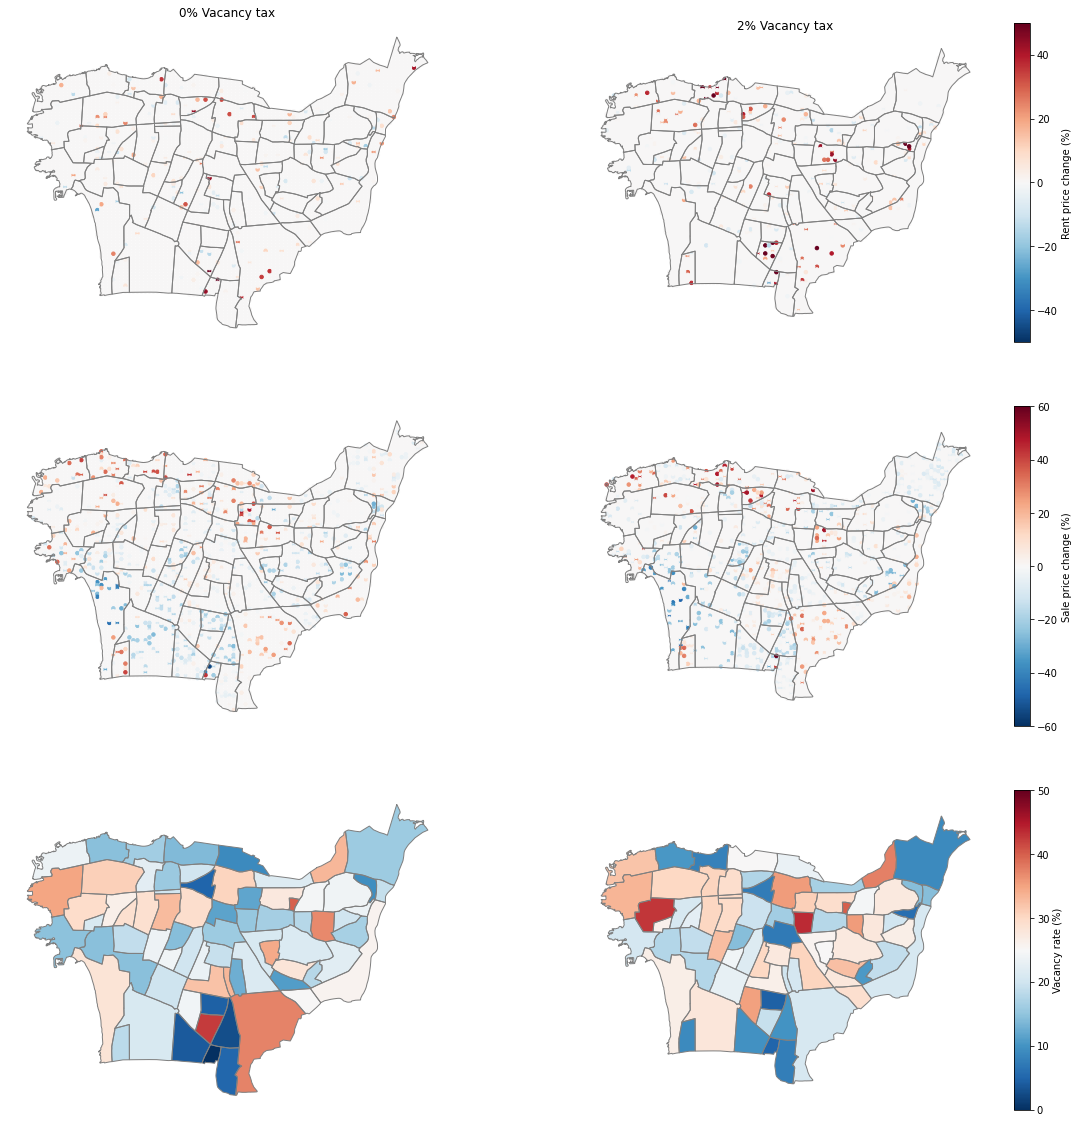

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 

boundaries = gpd.read_file('../../neighbourhoods_clean.geojson')


fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# add titles
axs[0, 0].set_title('0% Vacancy tax')
axs[0, 1].set_title('2% Vacancy tax')

## with 0% vacancy tax
ownership_0.plot(column='rent delta', 
                 ax=axs[0, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
                 vmin=-50,
                 vmax=50,
)

ownership_0.plot(column='sale delta', 
                 ax=axs[1, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-60,
                 vmax=60,
)
neighbourhoods_0.plot(column='vacancy rate',
                      ax=axs[2, 0],
                      legend=False,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)


### with 2% vacancy tax
ownership_2.plot(column='rent delta', 
                 ax=axs[0, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
                 vmin=-50,
                 vmax=50,
)

ownership_2.plot(column='sale delta', 
                 ax=axs[1, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-60,
                 vmax=60,
)
neighbourhoods_2.plot(column='vacancy rate',
                      ax=axs[2, 1],
                      legend=True,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)
#axs[2, 0].set_clim(0, 60)
#plt.set_clim(0, 60)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(frame_on=False)
        boundaries.plot(ax=ax, facecolor="none", edgecolor="#808080")
